In [1]:
%load_ext autoreload

In [2]:
import pandas as pd
import numpy as np
import random
import torch
import sys
import os
sys.path.append('/home/icb/till.richter/git/feature-attribution-sc')

In [3]:
%autoreload 2
from feature_attribution_sc.data.get_data import get_scgen_data, get_hlca_data
from feature_attribution_sc.models.scgen_models import SCGENCustom
from feature_attribution_sc.inference.test_scgen import test_scgen
from feature_attribution_sc.explainers.mask import mask, generate_rankings

Global seed set to 0


### Random data

In [4]:
# Read the .csv file using pandas
df = pd.read_csv('/home/icb/till.richter/git/feature-attribution-sc/outputs/baselines/task1_random.csv')
df = df[:20]  # only sample genes
print(df)

     gene_symbols    AHR  ARID1A  ARRDC3   ATL1   BAK1  BCL2L11  BCORL1  \
0    RP11-34P13.3   7589    1743    6500   5135  10731     6177   13420   
1    RP11-34P13.7  12298      63     487    653  11293    14609   12697   
2      FO538757.2   5670   10686   18484   5827   2086    10600    3995   
3      AP006222.2  14377    2775   12943  16222  14301    12372   11231   
4   RP4-669L17.10  12794    4155    8906   4511  18270    14146    1907   
5    RP5-857K21.4   1462    2640   16406  10765   2509    11243   17423   
6   RP11-206L10.9   1094   14397    3005   1680   2407     5297   12800   
7       LINC00115   1911   16490    9629   3218  17899    10558    5298   
8          FAM41C  14874   14235    1809   6262   6410    10293   17063   
9    RP11-54O7.16  17942   14321    2906  13607   9195      542    9435   
10    RP11-54O7.1   7388   19007   13443   9328  18392    14997    3934   
11    RP11-54O7.2   6929   16423   10972  15976  17551     4084   18866   
12    RP11-54O7.3   7849 

In [5]:
df.shape

(20, 107)

In [6]:
# Get pert names
pert_names = df.columns.values[1:]

In [7]:
# Set the threshold to 0.5
threshold = 0.5

# Number of cells
n = 100

# Generate some random data for x and y
x = np.random.random((df.shape[0], n))  # exclude one column which is the gene_symbol
y = random.sample(pert_names.tolist(), n)

In [8]:
# Generate the rankings dictionary
rankings, gene_indices = generate_rankings(df)

In [9]:
x.shape

(20, 100)

In [10]:
len(y)

100

In [11]:
# Apply the mask to the data, this needs to be fast since it's in the training loop...
masked_x = mask(x, y, rankings, gene_indices, threshold)

In [12]:
np.count_nonzero(masked_x == 0)

1000

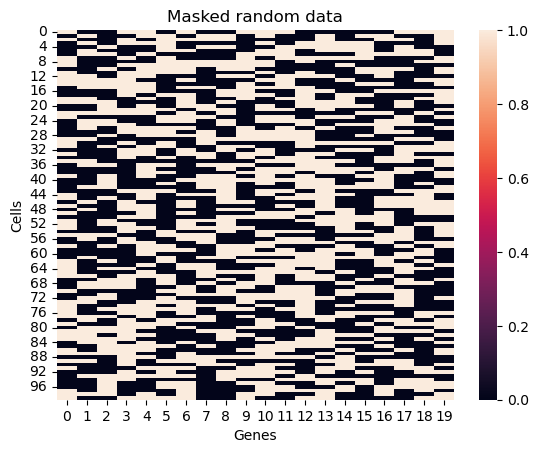

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

# Replace all non-zero values with 1 for sake of visualization
vis_data = masked_x.copy()
vis_data[vis_data != 0] = 1

# Create the heatmap using the `sns.heatmap` function
sns.heatmap(vis_data, ax=ax)

# Add x and y axis labels
ax.set_xlabel('Genes')
ax.set_ylabel('Cells')

# Add title
plt.title('Masked random data')

# Show the plot
plt.show()